# 1 Data collection and preprocessing


In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Download historical stock price data
ticker = "JPM"
#data = yf.download(ticker, start='2015-01-01', end='2023-10-01')
data = yf.download(ticker, start='2021-10-01', end='2023-10-11')

# We'll focus on the 'Close' price for this example
stock_prices = data['Close']
data


[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,JPM,JPM,JPM,JPM,JPM,JPM
Date,,,,,,
2021-10-01 00:00:00+00:00,152.737000,167.130005,168.300003,163.600006,164.000000,11285000
2021-10-04 00:00:00+00:00,152.572479,166.949997,170.440002,165.729996,166.970001,14120000
2021-10-05 00:00:00+00:00,155.064041,168.660004,170.139999,166.669998,167.210007,12292900
2021-10-06 00:00:00+00:00,155.395020,169.020004,169.100006,166.000000,167.990005,8692600
2021-10-07 00:00:00+00:00,156.378754,170.089996,171.509995,169.539993,171.199997,10195400
...,...,...,...,...,...,...
2023-10-04 00:00:00+00:00,138.981216,143.350006,143.470001,141.929993,143.190002,8128700
2023-10-05 00:00:00+00:00,139.567200,142.899994,143.100006,140.830002,142.039993,8576200


In [ ]:
# Checking null value
data.isnull().sum()

,,0
Price,Ticker,
Adj Close,JPM,0
Close,JPM,0
High,JPM,0
Low,JPM,0
Open,JPM,0
Volume,JPM,0


In [ ]:
data.describe()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,JPM,JPM,JPM,JPM,JPM,JPM
count,509.000000,509.000000,509.000000,509.000000,509.000000,5.090000e+02
mean,130.081087,137.809745,139.181630,136.396680,137.840983,1.233686e+07
std,15.190631,16.388231,16.404081,16.459508,16.443486,5.660043e+06
min,96.699577,101.959999,104.540001,101.279999,101.800003,3.220500e+06
25%,119.340591,127.099998,128.229996,125.910004,126.790001,8.728600e+06
50%,131.261688,138.179993,139.119995,136.259995,137.949997,1.110750e+07
75%,141.880081,148.160004,149.639999,147.179993,148.600006,1.403830e+07
max,157.932480,171.779999,172.960007,170.539993,172.710007,4.393130e+07


**Milestone 2: Model Development and Training**

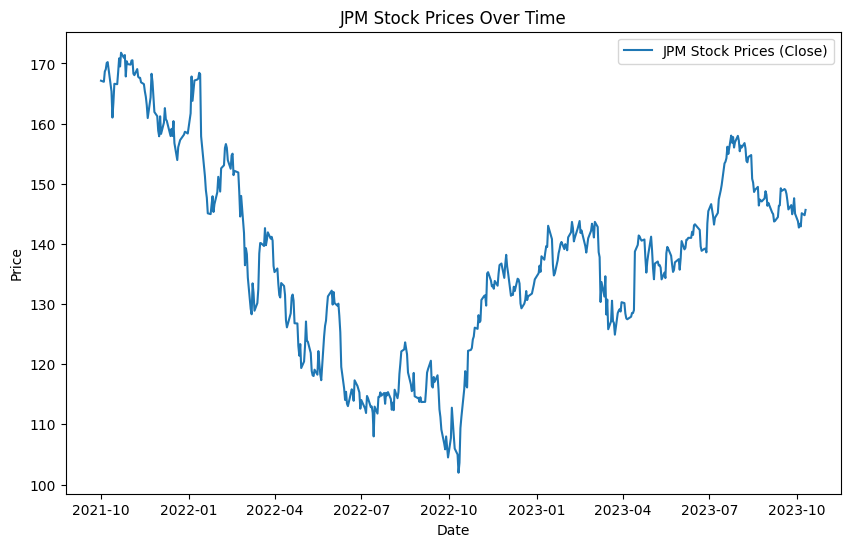

In [ ]:
# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(stock_prices, label='JPM Stock Prices (Close)')
plt.title('JPM Stock Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# type(data)
# data['Close'].tolist()

In [ ]:
from statsmodels.tsa.stattools import adfuller

# Perform Augmented Dickey-Fuller test to check stationarity
result = adfuller(stock_prices)

print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

# Initialize stock_prices_diff to the original data
stock_prices_diff = stock_prices  # Default to the original data

if result[1] > 0.05:
    print("The series is not stationary, applying differencing...")
    stock_prices_diff = stock_prices.diff().dropna()  # Apply first-order differencing
else:
    print("The series is stationary.")

ADF Statistic: -2.0028861828478286
p-value: 0.28530904422910064
The series is not stationary, applying differencing...


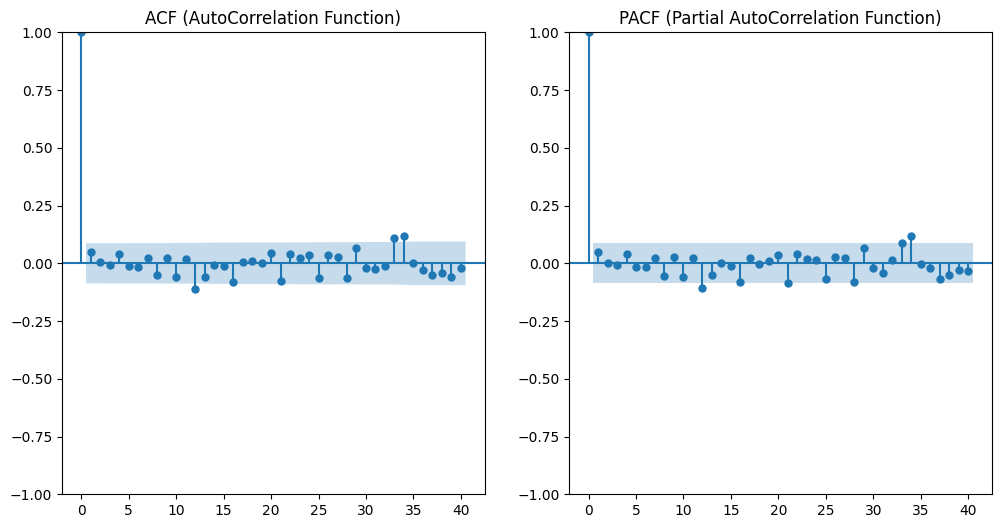

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# A lag refers to the time difference between a particular observation and a prior observation in the dataset.
# Interms of ACF - Lag is the number of time steps backward from the current point for which we are calculating the correlation.
# Plot ACF and PACF
plt.figure(figsize=(12, 6))
plt.subplot(121)
plot_acf(stock_prices_diff, lags=40, ax=plt.gca())
plt.title('ACF (AutoCorrelation Function)')
plt.subplot(122)
plot_pacf(stock_prices_diff, lags=40, ax=plt.gca())
plt.title('PACF (Partial AutoCorrelation Function)')
plt.show()


In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA model (e.g., ARIMA(1, 2, 1))
model = ARIMA(stock_prices, order=(1, 2, 1))
model_fit = model.fit()

# Print summary of the model
print(model_fit.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                    JPM   No. Observations:                  509
Model:                 ARIMA(1, 2, 1)   Log Likelihood               -1118.827
Date:                Fri, 25 Oct 2024   AIC                           2243.654
Time:                        01:01:01   BIC                           2256.339
Sample:                             0   HQIC                          2248.628
                                - 509                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0496      0.038      1.320      0.187      -0.024       0.123
ma.L1         -0.9961      0.010   -101.634      0.000      -1.015      -0.977
sigma2         4.7889      0.216     22.135      0.0

In [64]:
from sklearn.preprocessing import MinMaxScaler

close_data = data[['Close']]

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(close_data)

# Create sequences for LSTM
def create_sequences(data, sequence_length):
    sequences = []
    labels = []
    for i in range(len(data) - sequence_length):
        sequences.append(data[i:i + sequence_length])
        labels.append(data[i + sequence_length])
    return np.array(sequences), np.array(labels)

sequence_length = 50
X, y = create_sequences(scaled_data, sequence_length)

In [65]:
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [66]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential()
model.add(LSTM(50, activation = "relu", input_shape=(sequence_length, 1)))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'mse')
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_10 (LSTM)                       │ (None, 50)                  │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,451 (40.82 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

In [67]:
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

Epoch 1/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - loss: 0.2789 - val_loss: 0.3179
Epoch 2/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.1168 - val_loss: 0.0896
Epoch 3/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0237 - val_loss: 0.0061
Epoch 4/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0106 - val_loss: 0.0175
Epoch 5/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0079 - val_loss: 0.0062
Epoch 6/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0055 - val_loss: 0.0063
Epoch 7/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0051 - val_loss: 0.0036
Epoch 8/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0051 - val_loss: 0.0035
Epoch 9/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0049 - val_loss: 0.0033
Epoch 10/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0048 - val_loss: 0.0045
Epoch 11/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0045 - val_loss: 0.0033
Epoch 12/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0

In [ ]:
loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0026
Test Loss: 0.002285058842971921


In [ ]:
# Make predictions
y_pred = model.predict(X_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step


In [ ]:
y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform(y_test)

In [70]:
mse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE: {rmse:.2f}')

RMSE: 144.09


Milestone 3: Deployment and Insights

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


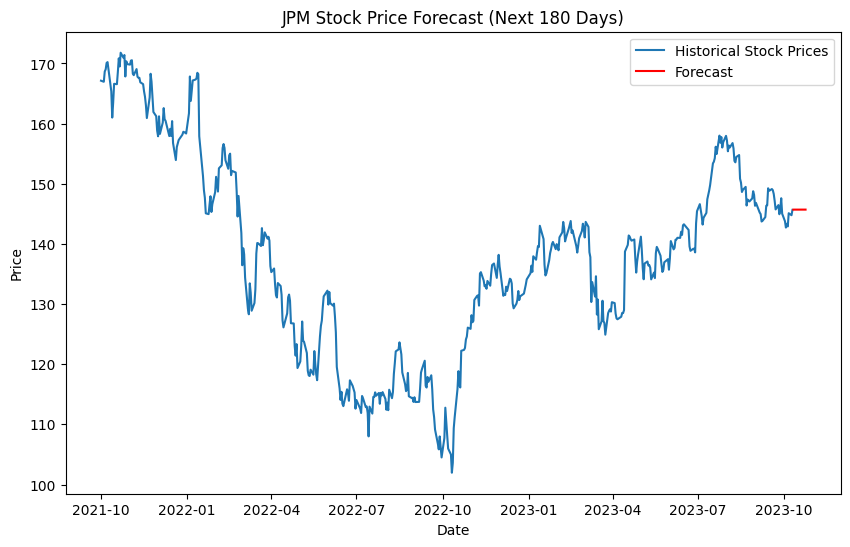

In [71]:
# Forecast the next 30 days
forecast = model_fit.forecast(steps=10)

# Plot the forecast
plt.figure(figsize=(10, 6))
plt.plot(stock_prices, label='Historical Stock Prices')
plt.plot(pd.date_range(start=stock_prices.index[-1], periods=11, freq='B')[1:], forecast, label='Forecast', color='red')
plt.title(f'{ticker} Stock Price Forecast (Next 180 Days)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

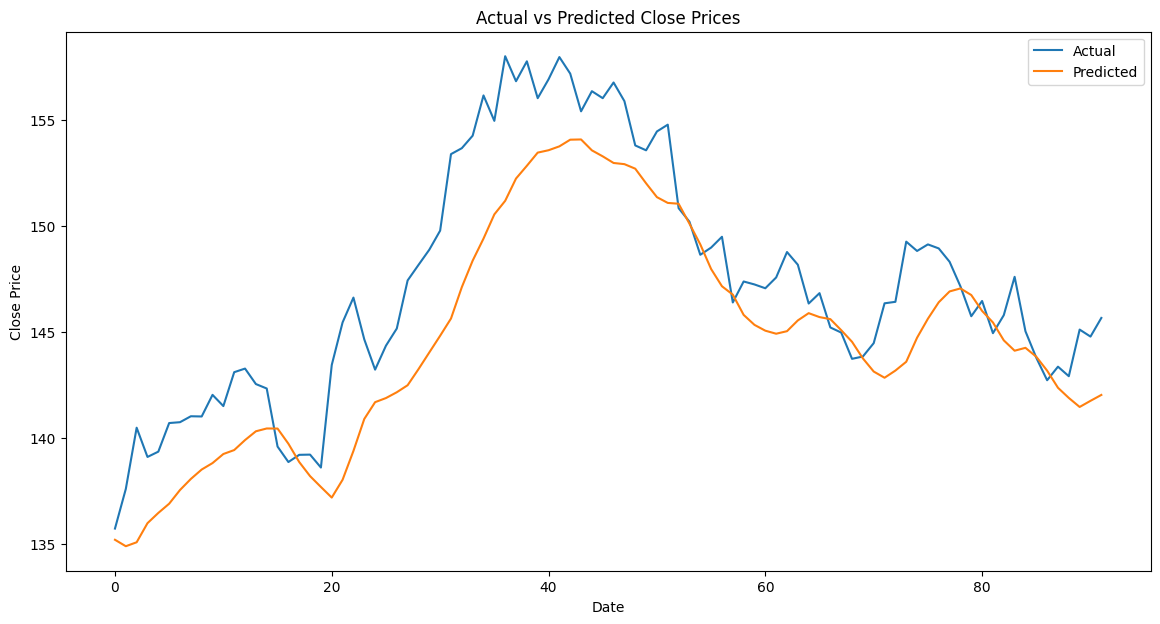

In [ ]:
plt.figure(figsize=(14,7))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title('Actual vs Predicted Close Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()